# Seaborn
Matplotlib is not designed for use with Pandas dataframes. In order to visualize data from a Pandas dataframe, you must extract each series and often concatenate these series’ together into the right format.

Seaborn provides an API on top of matplotlib which uses sane plot & color defaults, uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes

<img src="https://d39sghb3udgxv0.cloudfront.net/300812017/05/1494508552.jpg">

## Import packages

In [1]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt

# Importing Pandas
import pandas as pd
import random

# Seaborn for plotting and styling
#!conda install seaborn
import seaborn as sns



## Color Palettes and Style

In [2]:
# Default settings
# sns.set()
sns.set(style="darkgrid")

## Import Sample Data
**Car Sale Advertisements**
Data collected from private car sale advertisements in Ukraine

This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. At the end of the day I look at this data as a subset from all Ukrainian car fleet.

**Content**

Dataset contains 9576 rows and 10 variables with essential meanings:

- car: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel (“Other” in this case should be treated as NA)
- registration: whether car registered in Ukraine or not
- year: year of production
- model: specific model name
- drive: drive type
- Data has gaps, so be careful and check for NA’s. I tried to check and drop repeated offers, but theoretically duplications are possible.

In [3]:
car_dataset_url ='https://raw.githubusercontent.com/ankitind/sample_datasets/master/car_ad.csv'
car_ads = pd.read_csv(car_dataset_url)

## Playing with the data
Once the data is imported explore the data
Use panda functions like

- df.head()
- df.shape()
- df.describe()
- df.index()
- df.columns
- df.info()
- df.count()

In [4]:
car_ads.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [5]:
#Get number of rows and columns 
car_ads.shape

(9576, 10)

In [6]:
#Describe Index
car_ads.index

RangeIndex(start=0, stop=9576, step=1)

In [7]:
#Describe Columns
car_ads.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [8]:
#Info on DataFrame
car_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [9]:
#Number of non-NA values
car_ads.count()

car             9576
price           9576
body            9576
mileage         9576
engV            9142
engType         9576
registration    9576
year            9576
model           9576
drive           9065
dtype: int64

In [10]:
car_ads.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,863,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [11]:
#Drop missing observations
car_ads_no_missing = car_ads.dropna()

In [12]:
car_ads_no_missing.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,8739,8739.000000,8739,8739.000000,8739.000000,8739,8739,8739.000000,8739,8739
unique,83,NaN,6,NaN,NaN,4,2,NaN,827,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,860,NaN,3321,NaN,NaN,4065,8236,NaN,182,4973
mean,NaN,15733.542261,NaN,140.095434,2.588607,NaN,NaN,2006.609681,NaN,NaN
std,NaN,24252.904810,NaN,97.892213,5.416670,NaN,NaN,6.968947,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5000.000000,NaN,71.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9250.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16800.000000,NaN,195.500000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [13]:
car_ads_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8739 entries, 0 to 9575
Data columns (total 10 columns):
car             8739 non-null object
price           8739 non-null float64
body            8739 non-null object
mileage         8739 non-null int64
engV            8739 non-null float64
engType         8739 non-null object
registration    8739 non-null object
year            8739 non-null int64
model           8739 non-null object
drive           8739 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 751.0+ KB


## 1. Distribution

It is commonly used at the initial stage of data exploration i.e. when we get started with understanding the variable. Variables are of two types: Continuous and Categorical. For continuous variable, we look at the centre, spread, outlier. For categorical variable we look at frequency table. Visualization types used to represent these are:-
When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed.

Examining df.describe() , car_ads_no_missing.describe(), we find 
Columns (car, body, engType, registration, model, drive) are categorical variables and
Columns (price, mileage, engV, year) are continuous variables


### a. Histogram
It is used for showing the distribution of continuous variables. 
One of the catch with histogram is ‘number of bins’. Let’s understand it in detail using example below:

## Linear Model Plot in Seaborn
sns.lmplot('x', 'y', data=df, fit_reg=False)


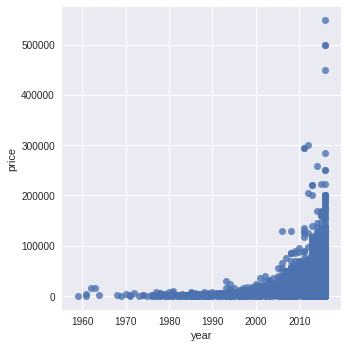

In [14]:
sns.lmplot(x='year', y='price', data = car_ads_no_missing, fit_reg=False)
plt.show()


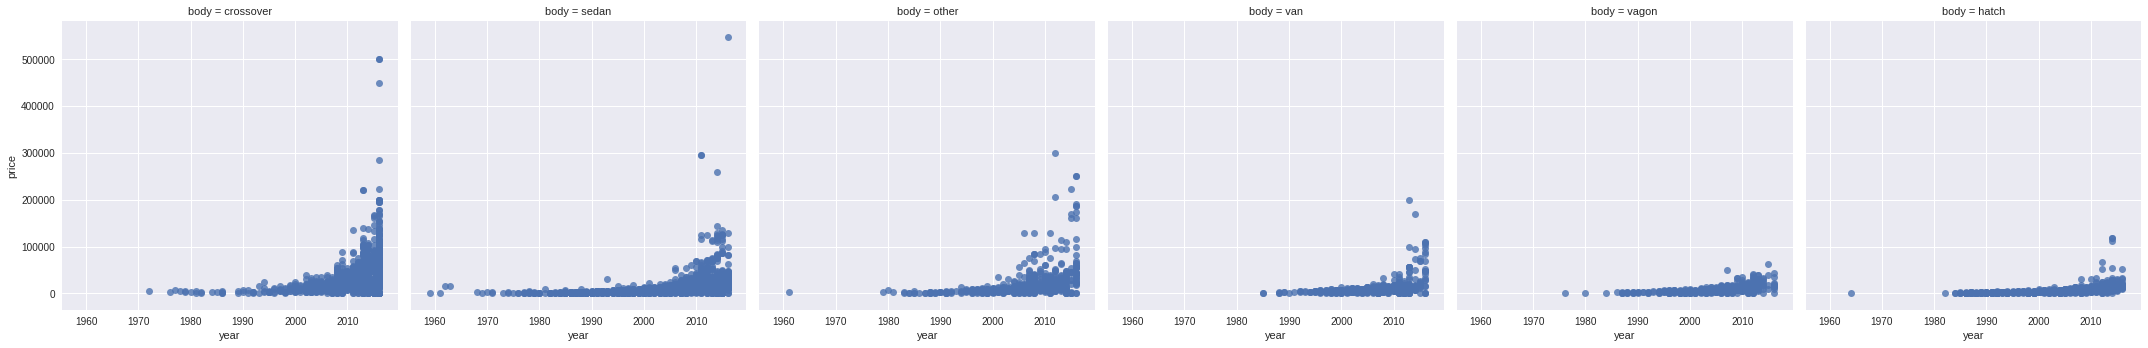

In [15]:
#With Different plots using col="Name" or rows="Name"
sns.lmplot(x='year', y='price', data = car_ads_no_missing, col='body', fit_reg=False)
plt.show()

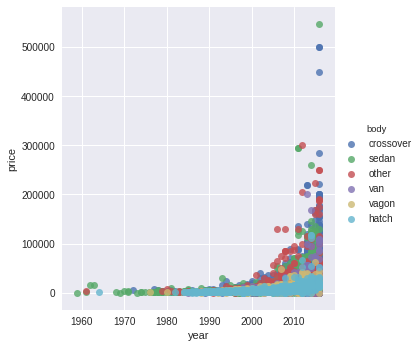

In [16]:
#With Different plots using hue="columnName"
sns.lmplot(x='year', y='price', data = car_ads_no_missing, hue='body', fit_reg=False)
plt.show()

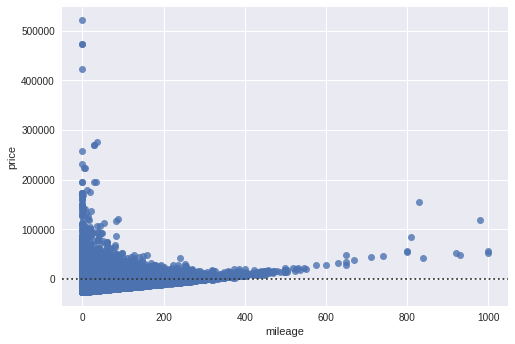

In [17]:
sns.residplot(x='mileage', y='price', data = car_ads_no_missing)
plt.show()

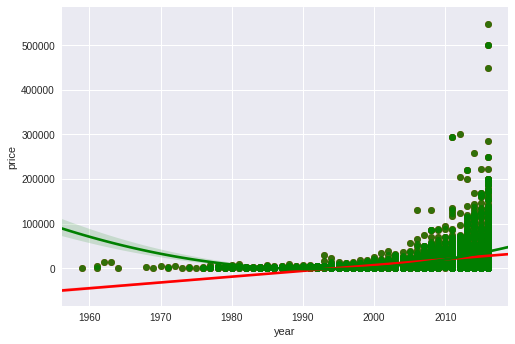

In [18]:
#With Different plots using hue="columnName"
sns.regplot(x='year', y='price', data = car_ads_no_missing, color='red')

sns.regplot(x='year', y='price', data = car_ads_no_missing, order = 2,  color='green')
plt.show()